In [585]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [587]:
data=pd.read_csv(r"C:\Users\rudra\Downloads\test_energy_data.csv")
data.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


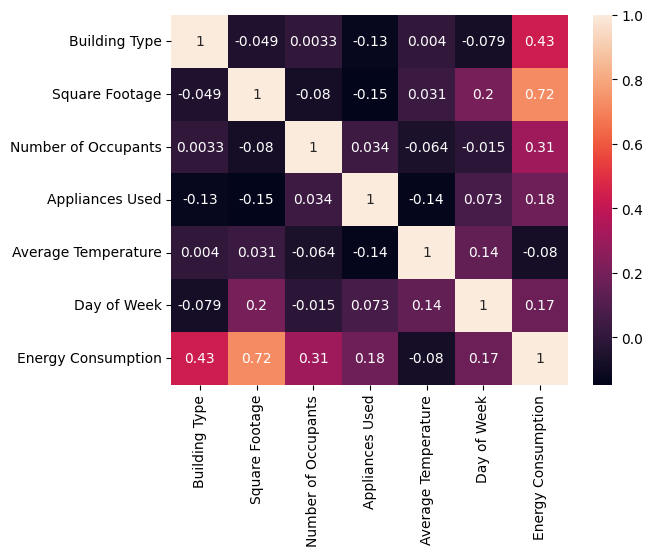

In [680]:
sns.heatmap(data=data.corr(),annot=True)
plt.show()

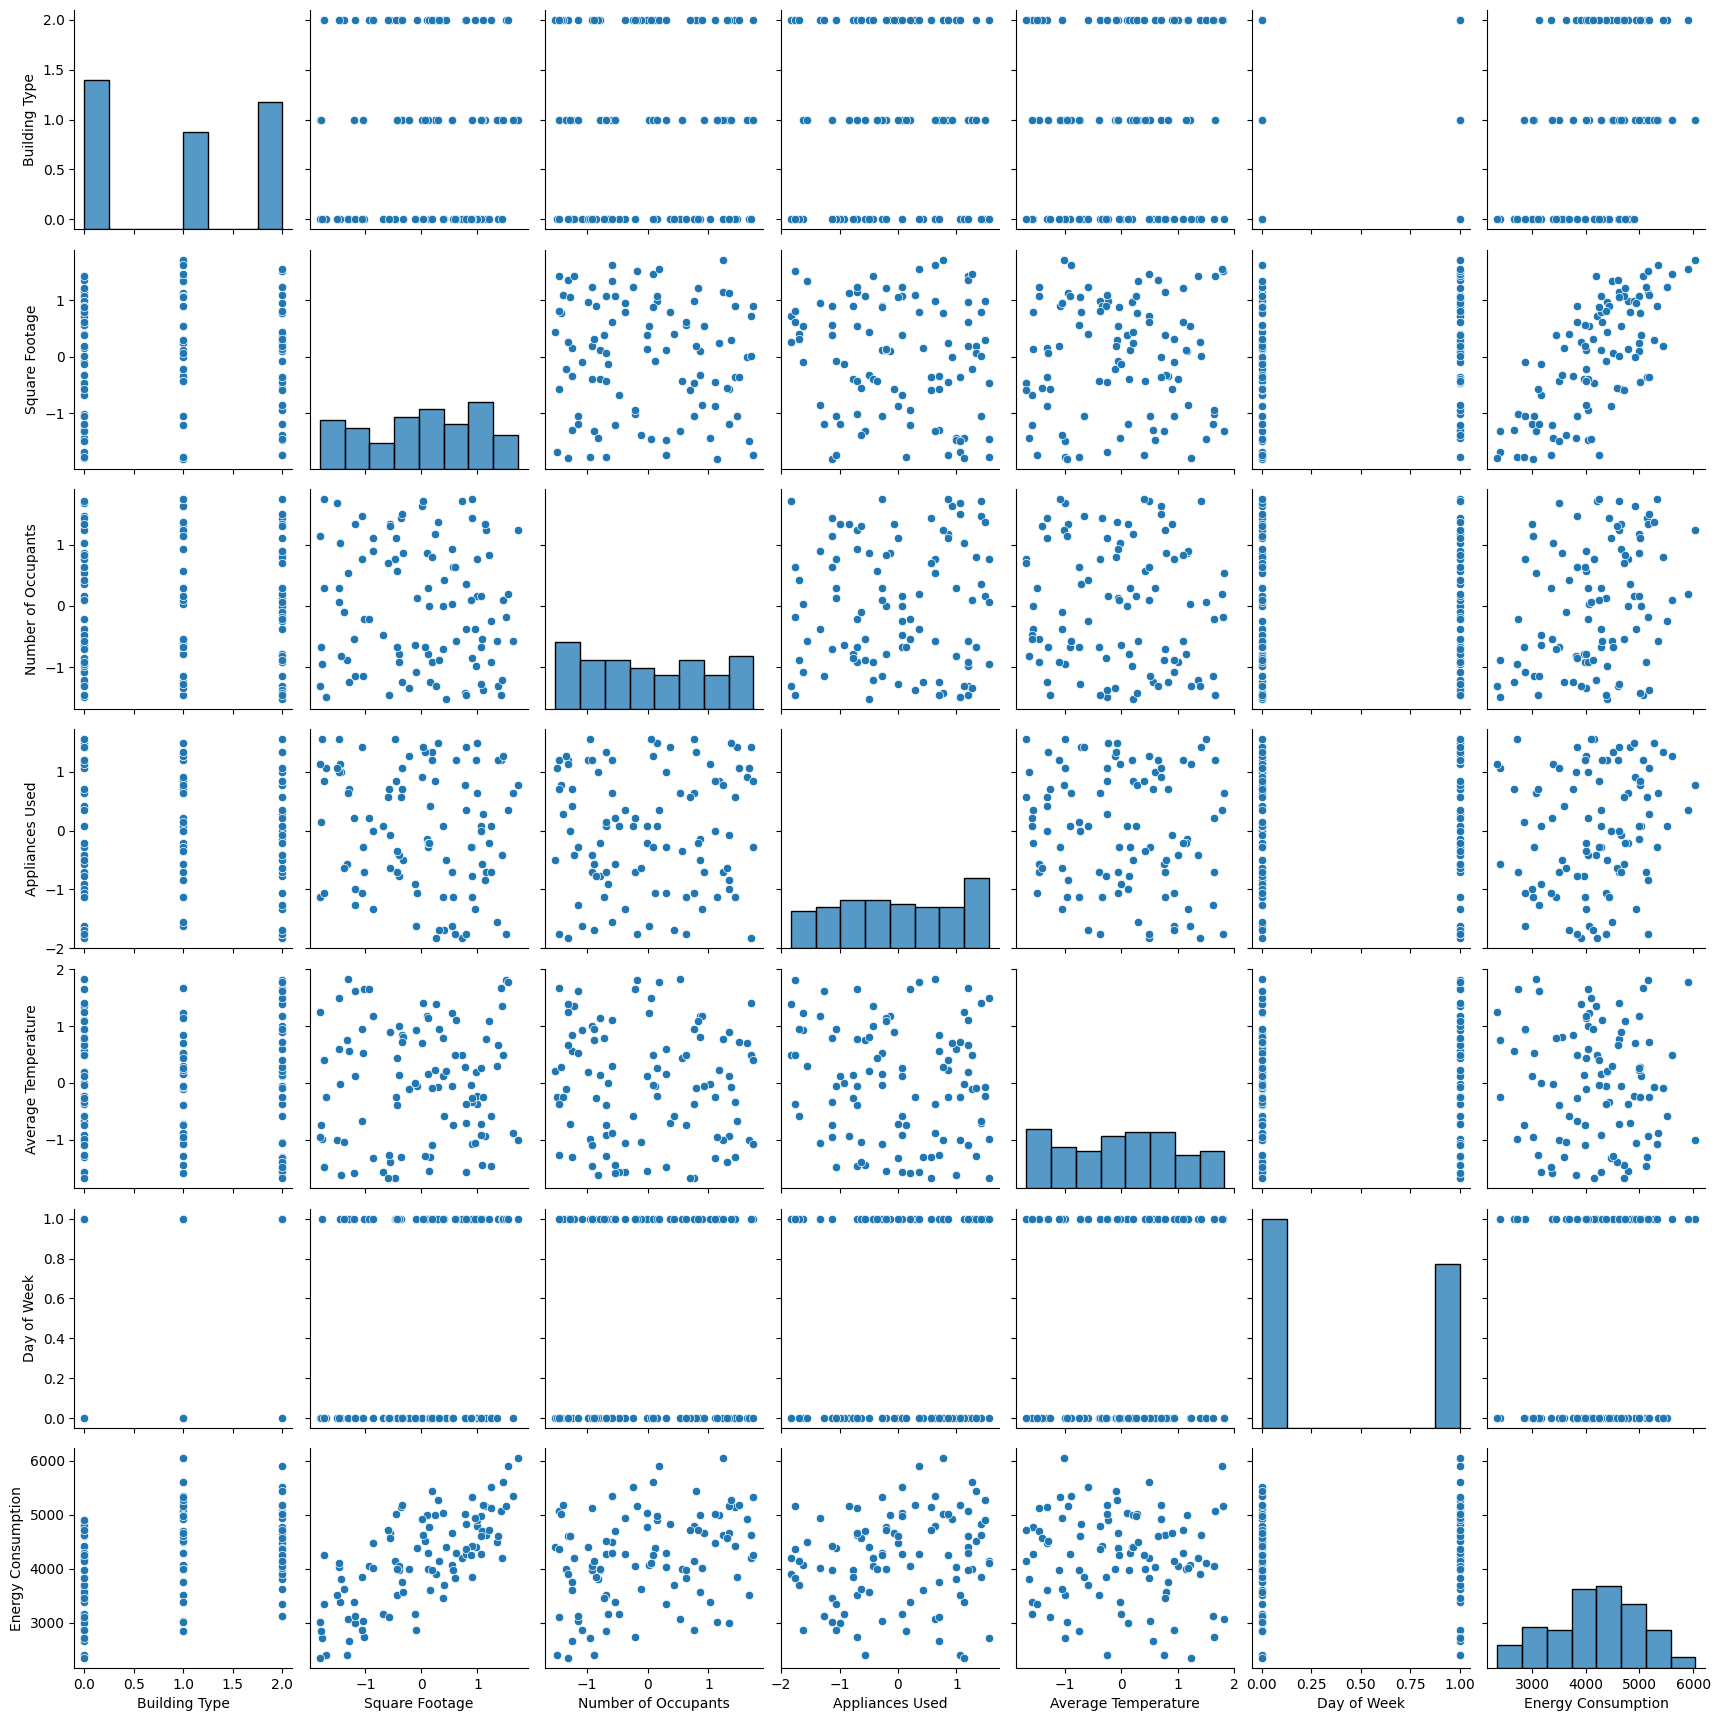

In [684]:
sns.pairplot(data=data)
plt.show()

In [589]:
data.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [591]:
data['Building Type'].unique()

array(['Residential', 'Commercial', 'Industrial'], dtype=object)

In [593]:
data.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

## Data Preprocession 

## Building Type/Ordinal Encoding

In [597]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['Residential', 'Commercial', 'Industrial']])
oe.fit(data[['Building Type']])

OrdinalEncoder(categories=[['Residential', 'Commercial', 'Industrial']])

In [599]:
data['Building Type']=oe.transform(data[['Building Type']]).astype(int)
data.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,0,24563,15,4,28.52,Weekday,2865.57
1,1,27583,56,23,23.07,Weekend,4283.80
2,1,45313,4,44,33.56,Weekday,5067.83
3,0,41625,84,17,27.39,Weekend,4624.30
4,0,36720,58,47,17.08,Weekday,4820.59


## Day Of Week/Ordinal Encoding

In [602]:
from sklearn.preprocessing import OrdinalEncoder
oe1=OrdinalEncoder(categories=[['Weekend','Weekday']])
oe1.fit(data[['Day of Week']])

OrdinalEncoder(categories=[['Weekend', 'Weekday']])

In [604]:
data['Day of Week']=oe1.transform(data[['Day of Week']]).astype(int)
data.head(2)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,0,24563,15,4,28.52,1,2865.57
1,1,27583,56,23,23.07,0,4283.80


## Feature Scaling

## Before Scaling Pattern

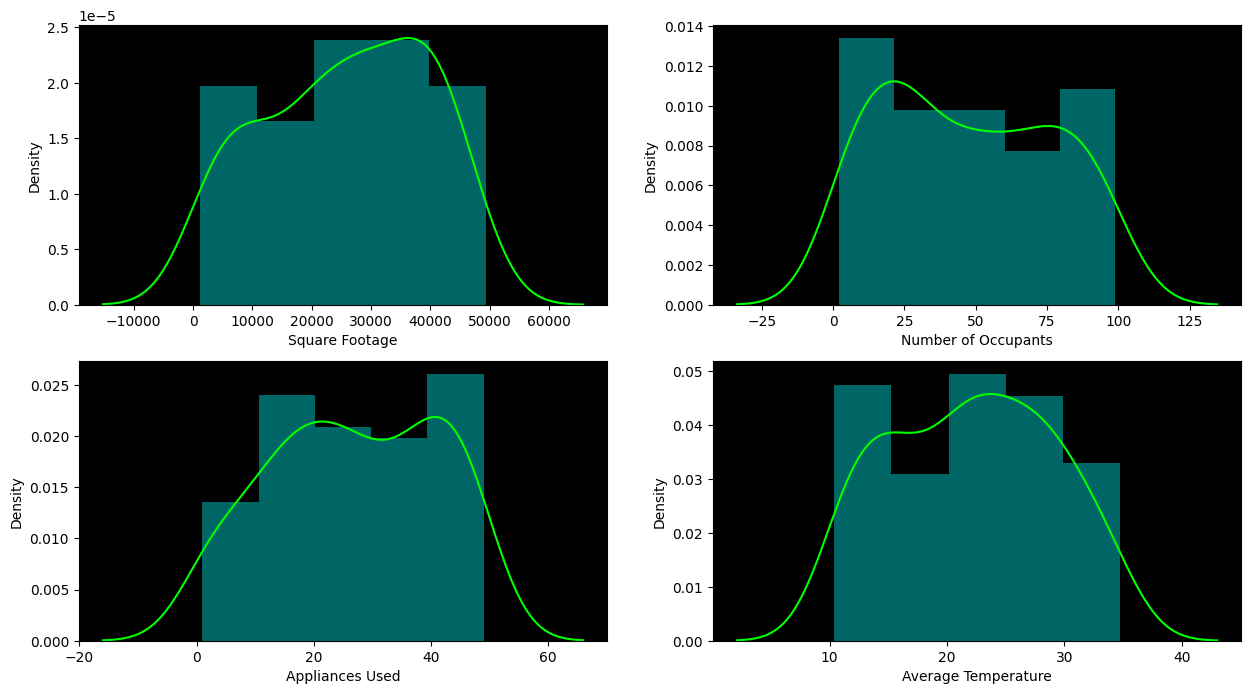

In [608]:
col=['Square Footage','Number of Occupants','Appliances Used','Average Temperature']
plt.figure(figsize=(15,8))
for i,var in enumerate(col):
    plt.subplot(2,2,i+1)
    ax=sns.distplot(data[var],kde_kws={'color':'#00FF00'},color='cyan')
    ax.set_facecolor("k")

In [609]:
col=['Square Footage','Number of Occupants','Appliances Used','Average Temperature']
from sklearn.preprocessing import StandardScaler
ms=StandardScaler()
for i in col:
    data[col]=ms.fit_transform(data[col])
data.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,0,-0.096678,-1.083157,-1.621433,0.935524,1,2865.57
1,1,0.124691,0.294734,-0.280239,0.148301,0,4283.80
2,1,1.424321,-1.452835,1.202134,1.663524,1,5067.83
3,0,1.153986,1.235733,-0.703774,0.772301,0,4624.30
4,0,0.794444,0.361948,1.413901,-0.716921,1,4820.59


## After Scaling 

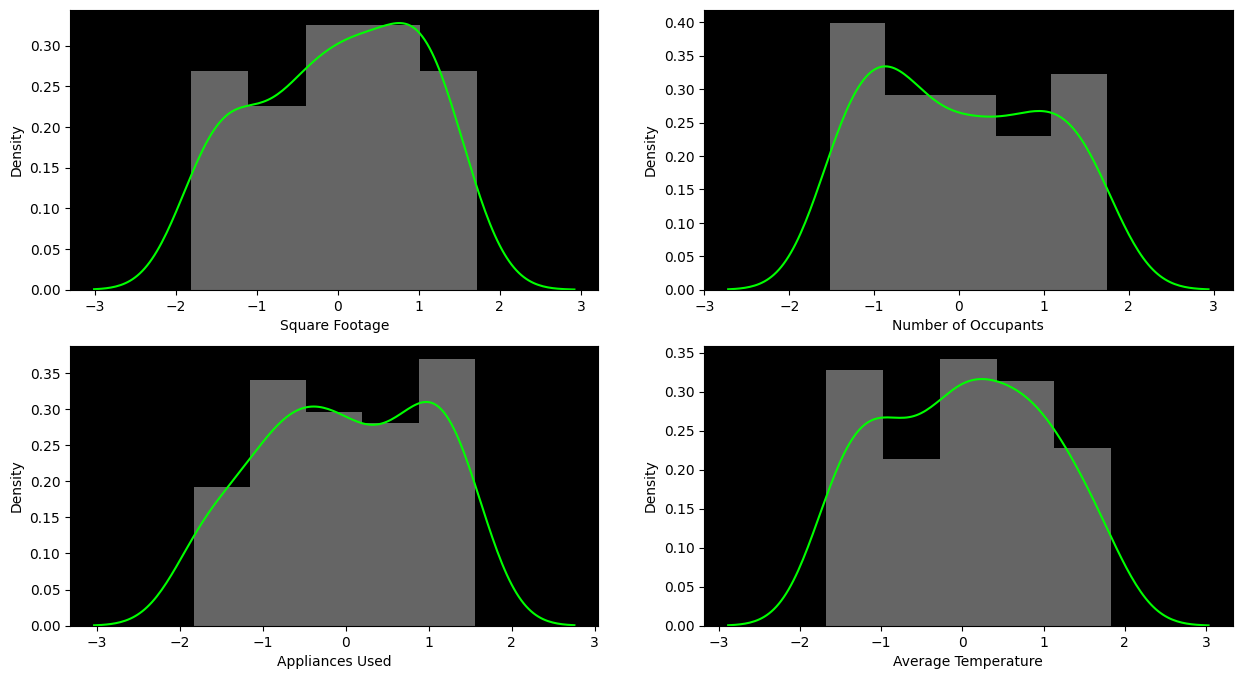

In [613]:
col=['Square Footage','Number of Occupants','Appliances Used','Average Temperature']
plt.figure(figsize=(15,8))
for i,var in enumerate(col):
    plt.subplot(2,2,i+1)
    ax=sns.distplot(data[var],kde_kws={'color':'#00FF00'},color='w')
    ax.set_facecolor("k")

## Train/Test Split

In [638]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

## Multiple Linear Regression

In [641]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [643]:
lr.score(x_test,y_test)*100

99.9999999604973

In [645]:
y_prd=lr.predict(x_test)
df=pd.DataFrame({'Actual':y_test,"Predict":y_prd})
df.head()

,Actual,Predict
20,4379.87,4379.846790
91,3977.63,3977.651775
34,3598.87,3598.849527
52,5275.92,5275.894508
8,3969.09,3969.097289


In [740]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=150)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=150)

In [742]:
rf.score(x_test,y_test)*100

83.07879539740122

In [744]:
y_prd=rf.predict(x_test)
df=pd.DataFrame({'Actual':y_test,"Predict":y_prd})
df.head(2)

,Actual,Predict
20,4379.87,4152.833533
91,3977.63,4183.286667


## New Data Predict

In [764]:
new=pd.DataFrame([['Commercial',27583,56,23,23.07,'Weekend']],columns=x_train.columns)
new

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week
0,Commercial,27583,56,23,23.07,Weekend


In [766]:
new['Building Type']=oe.fit_transform(new[['Building Type']])
new['Day of Week']=oe1.fit_transform(new[['Day of Week']])

In [768]:
col=['Square Footage','Number of Occupants','Appliances Used','Average Temperature']
new[col]=ms.fit_transform(new[col])

In [770]:
new

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week
0,1.0,0.0,0.0,0.0,0.0,0.0


In [772]:
lr.predict([[1,0.124691,0.294734,-0.280239,0.148301,0]])

array([4283.79683812])

In [774]:
lr.predict(new)

array([4195.57610503])

In [776]:
rf.predict(new)

array([4445.28906667])